In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
PercentagePeopleBelowPovertyLevel = pd.read_csv("./PercentagePeopleBelowPovertyLevel.csv",encoding = "cp1252")
PercentagePeopleBelowPovertyLevel

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [12]:
PercentagePeopleBelowPovertyLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [13]:
PercentagePeopleBelowPovertyLevel.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


Text(0.5, 1.0, 'Poverty Rate Given States')

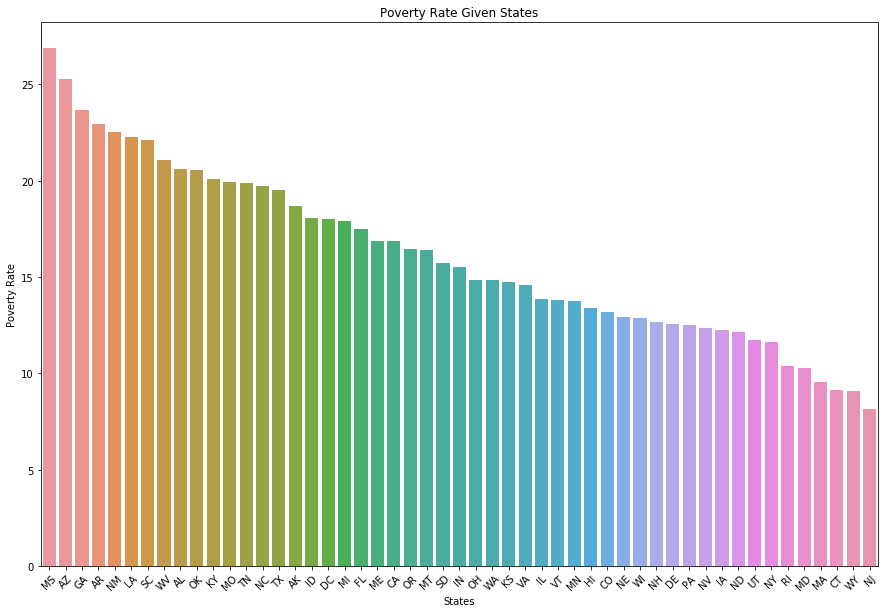

In [14]:
# Poverty rate of each state
PercentagePeopleBelowPovertyLevel.poverty_rate.replace(["-"],0.0,inplace=True)
PercentagePeopleBelowPovertyLevel.poverty_rate = PercentagePeopleBelowPovertyLevel.poverty_rate.astype(float)
area_list = list(PercentagePeopleBelowPovertyLevel["Geographic Area"].unique())
area_poverty_ratio = []

for i in area_list:
    x = PercentagePeopleBelowPovertyLevel[PercentagePeopleBelowPovertyLevel['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')